In [93]:
import PIL
import matplotlib.pyplot as plt

import numpy as np
from pathlib import Path
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid

In [121]:
root = Path("E:\data512_2k")
n = 0
running_sum = np.zeros(3)
running_sumsq = np.zeros(3)
for impath in root.glob('*/*/*.jpg'):
    n += 1
    with PIL.Image.open(impath) as im:
        im = np.asarray(im)
    x = im.mean(axis=(0,1))
    running_sum += x
    running_sumsq += (x**2)
    running_mean = running_sum/n
    running_var = (running_sumsq/n) - (running_mean**2)
means = running_mean/255
stds = np.sqrt(running_var)/255
print(means)
print(stds)

[0.71912853 0.52574751 0.65523398]
[0.09877544 0.13415546 0.10635044]


In [131]:
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=means, std=stds)
    ])

def view_grid(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = means
    std = stds
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

In [132]:


#datasets
data_test = ImageFolder(root / "test", transform=data_transform)
data_train = ImageFolder(root / "train", transform=data_transform)
data_valid = ImageFolder(root / "valid", transform=data_transform)

#dataloaders
dl_test = DataLoader(data_test, batch_size=4, shuffle=True)
dl_train = DataLoader(data_train, batch_size=4, shuffle=True)
dl_valid = DataLoader(data_valid, batch_size=4, shuffle=True)

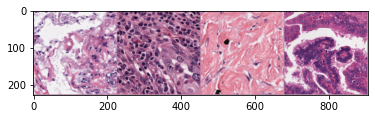

In [140]:
ims, _ = next(iter(dl_test))

grid = make_grid(ims)

view_grid(grid)